<a href="https://colab.research.google.com/github/shaffayqazi/Customer_churn_analyzing-and-prediction/blob/main/DSA_Final_CEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
churn_data= pd.read_csv("/content/telecom_customer_churn.csv")

In [ ]:
churn_data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [ ]:
churn_data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

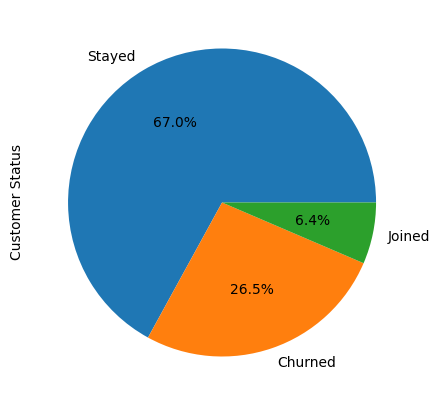

In [ ]:
churn_data['Customer Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#**is there a significant difference in the distribution of churn categories between male and female customers**

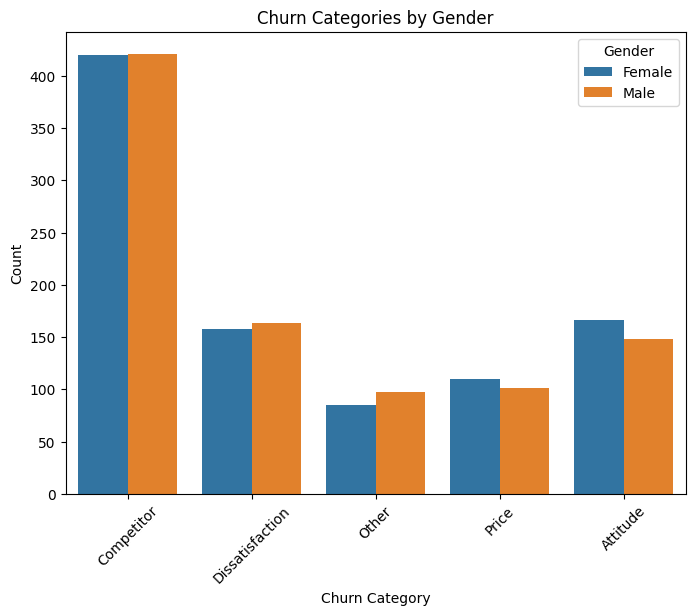

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Category', hue='Gender', data=churn_data)
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.title('Churn Categories by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

#**Among customers who are currently using the service, do those from certain cities?**

In [ ]:
# counting The most 8 cities in terms of the number of clients
clients_per_cities = churn_data.City.value_counts().head(8)
clients_per_cities

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Name: City, dtype: int64

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
def bars(bar_data,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_data.plot(kind="bar")

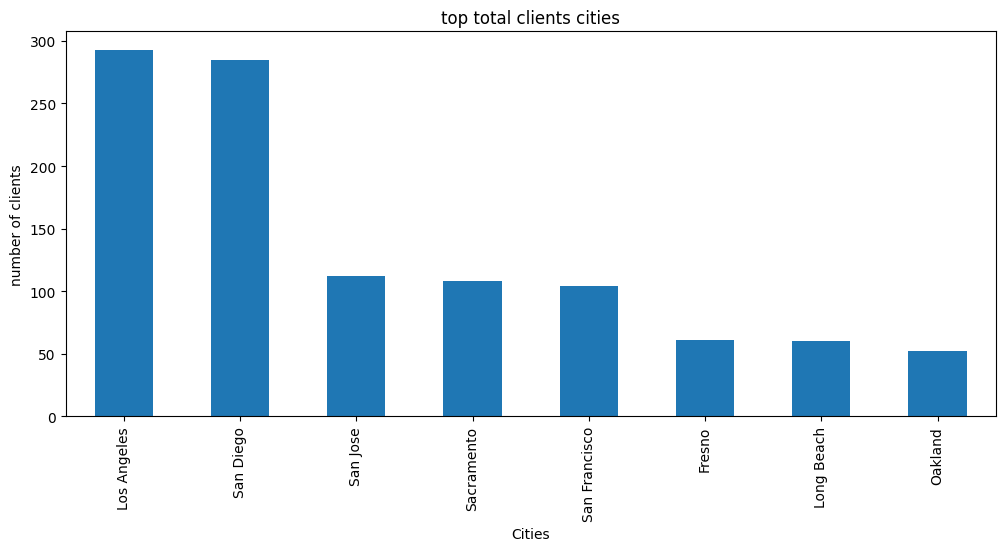

In [ ]:
bars(clients_per_cities,"top total clients cities","Cities","number of clients");

#**What is the distribution of customers by gender, age, and marital status?**

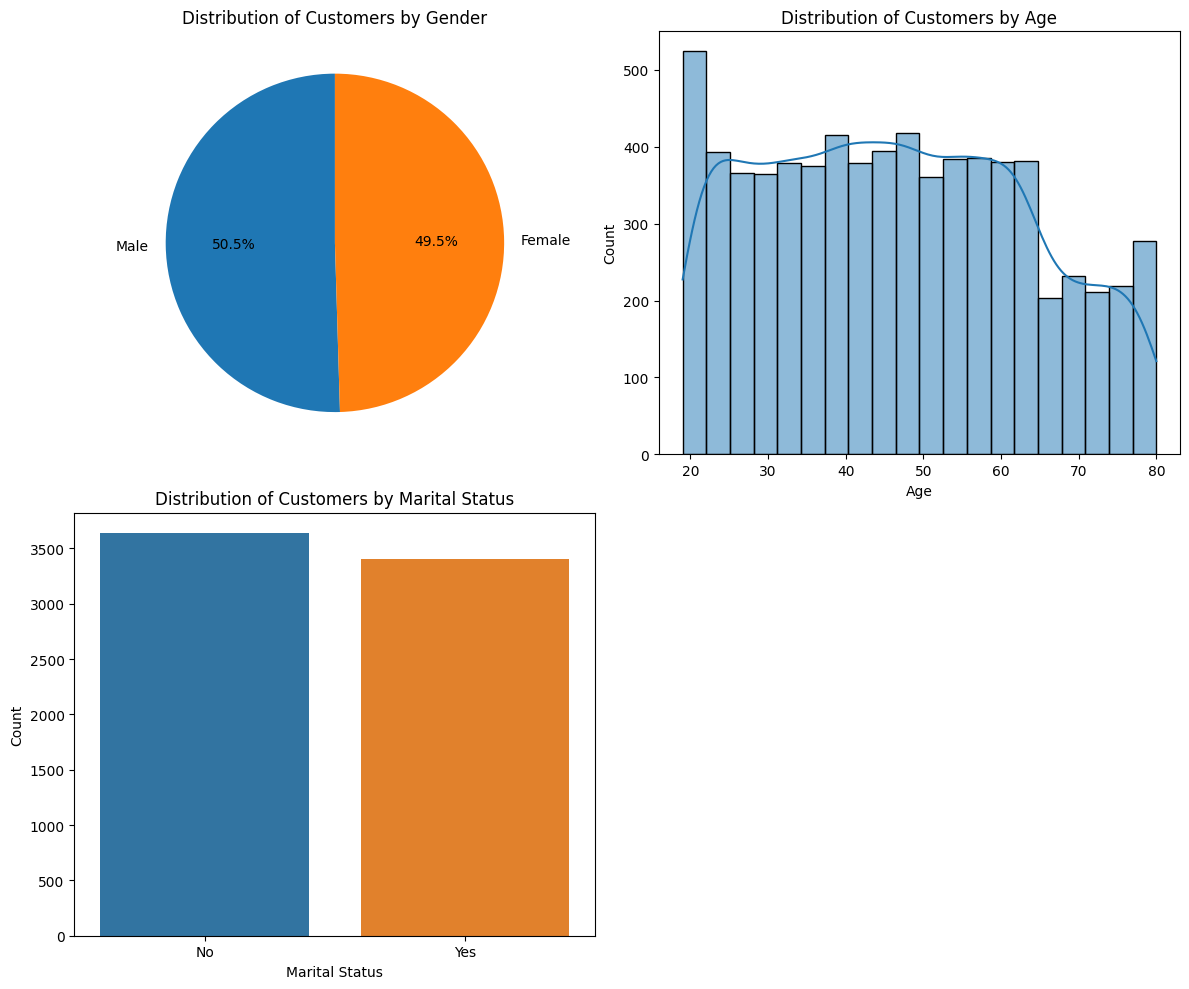

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Distribution by Gender (Pie Chart)
gender_counts = churn_data['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of Customers by Gender')

# Distribution by Age (Histogram)
sns.histplot(data=churn_data, x='Age', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Customers by Age')

# Distribution by Marital Status (Bar Plot)
marital_status_counts = churn_data['Married'].value_counts()
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, ax=axes[1, 0])
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Customers by Marital Status')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()

# Show the combined visualization
plt.show()

In [1]:
sns.countplot(data=churn_data,y="Churn Category",order = churn_data["Churn Category"].value_counts().index)

NameError: ignored

In [ ]:
churned = churn_data[churn_data['Customer Status'] != 'Joined']

In [ ]:
churned['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

num_data = churned.select_dtypes(include=['int64', 'float64'])
cat_data = churned.select_dtypes(include=['object'])

le = LabelEncoder()
cat_data = cat_data.apply(lambda  col: le.fit_transform(col))

final_data = pd.concat([num_data, cat_data], axis=1)

In [ ]:
final_data["Churn Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       1
3       2
4       2
       ..
7035    5
7036    1
7038    5
7039    2
7041    5
Name: Churn Category, Length: 4601, dtype: int64>

In [ ]:
final_data.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.6,...,1,0,0,1,1,1,1,1,5,20
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.0,...,0,1,1,0,0,0,1,1,5,20
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.9,...,0,0,0,1,0,1,0,0,1,2
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.0,...,1,1,0,1,0,1,0,0,2,18
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.9,...,1,0,0,1,0,1,1,0,2,14


In [ ]:
from sklearn.model_selection import train_test_split

final_data= final_data.dropna()
final_data= final_data.drop(columns=['Customer ID'])

X = final_data.drop(columns=['Customer Status'])
y = final_data['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
# from imblearn.over_sampling import SMOTE

# os = SMOTE(k_neighbors=5)
# X_smote, y_smote = os.fit_resample(X_train, y_train)
# X_train, y_train = X_smote, y_smote

In [ ]:
y_train.value_counts()

1    2408
0    1272
Name: Customer Status, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_test)
print(accuracy_score(predictions,y_test))

1.0


In [ ]:
predictions

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [ ]:
colors = ['orange', 'green']

#**What is the demographic profile of customers who churn compared to those who stay?**

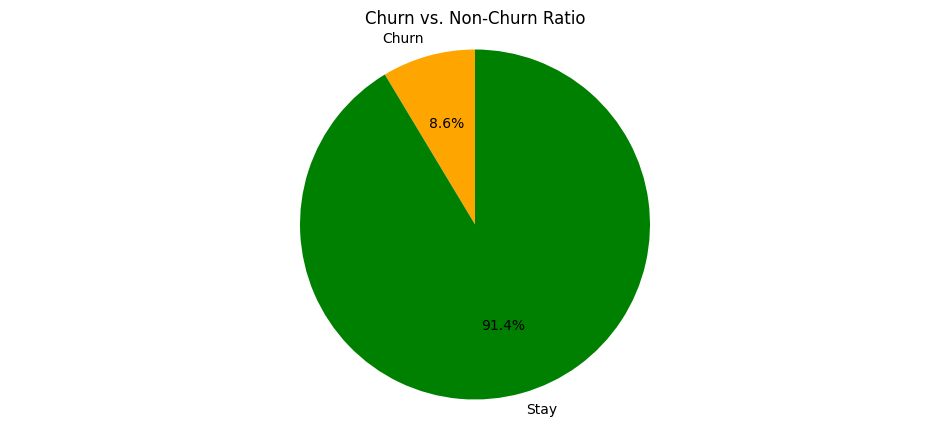

In [ ]:
churn_count = predictions.sum()
not_churned_count = len(churn_data) - churn_count
sizes = [churn_count, not_churned_count]
labels = ['Churn', 'Stay']
plt.pie(sizes, labels= labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Churn vs. Non-Churn Ratio')
plt.show()

In [ ]:
report = classification_report(y_test, predictions)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       607

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



In [ ]:
churn_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')